# AOS_DM-48563_donut_viz_CWFS_test

Run as a pipetask :

    pipetask run -b /sdf/data/rubin/repo/aos_imsim -i u/scichris/WET-001_lsstCam_direct_detect_cutout_2001  --instrument lsst.obs.lsst.LsstCam --register-dataset-types  -p /sdf/data/rubin/shared/scichris/DM-48563_WFS_donutPlot/lsstCamPipelinePlotDonutCwfs.yaml -j 10 --output-run u/scichris/WET-001_lsstCam_2001_plotDonutCwfs_test





the yaml contains just 

    
    description: test donutPlot CWFS
    instrument: lsst.obs.lsst.LsstCam
    tasks:
        plotDonutCwfsTask:
        class: lsst.donut.viz.PlotDonutCwfsTask
        config:
          doRubinTVUpload: false

          


In [4]:
refs

[DatasetRef(DatasetType('donutStampsExtra', {band, instrument, day_obs, detector, physical_filter, visit}, StampsBase), {instrument: 'LSSTCam', detector: 191, visit: 5024072302001, band: 'r', day_obs: 20240723, physical_filter: 'r_57'}, run='u/scichris/WET-001_lsstCam_direct_detect_cutout_2001', id=33647cab-eae8-40dd-b1cd-b6c8dcccbc8f),
 DatasetRef(DatasetType('donutStampsExtra', {band, instrument, day_obs, detector, physical_filter, visit}, StampsBase), {instrument: 'LSSTCam', detector: 195, visit: 5024072302001, band: 'r', day_obs: 20240723, physical_filter: 'r_57'}, run='u/scichris/WET-001_lsstCam_direct_detect_cutout_2001', id=bb55d787-0d73-4a49-9ef1-eb3cffbd8902),
 DatasetRef(DatasetType('donutStampsExtra', {band, instrument, day_obs, detector, physical_filter, visit}, StampsBase), {instrument: 'LSSTCam', detector: 199, visit: 5024072302001, band: 'r', day_obs: 20240723, physical_filter: 'r_57'}, run='u/scichris/WET-001_lsstCam_direct_detect_cutout_2001', id=c234e163-b904-4007-9b7

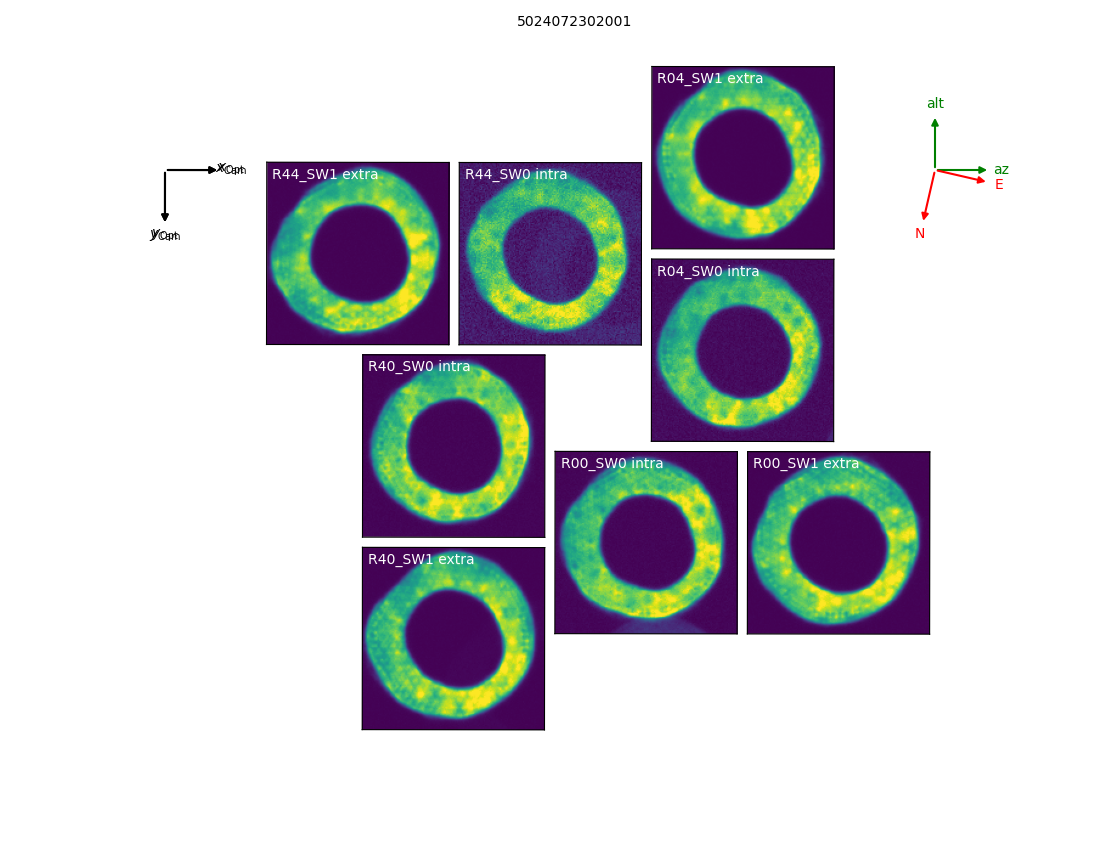

In [2]:
from IPython.display import Image
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/sdf/data/rubin/repo/aos_imsim/')
refs = butler.query_datasets('donutPlot', collections=['u/scichris/WET-001_lsstCam_2001_plotDonutCwfs_test'])
dr = refs[0]
butler.getURI(dr)
Image(butler.getURI(dr).read())

Testing an entire `donut_viz` pipeline:

In [5]:
refs = butler.query_datasets('donutStampsExtra', collections=['u/scichris/WET-001_lsstCam_direct_detect_cutout_2001'])
print(refs)

[DatasetRef(DatasetType('donutStampsExtra', {band, instrument, day_obs, detector, physical_filter, visit}, StampsBase), {instrument: 'LSSTCam', detector: 191, visit: 5024072302001, band: 'r', day_obs: 20240723, physical_filter: 'r_57'}, run='u/scichris/WET-001_lsstCam_direct_detect_cutout_2001', id=33647cab-eae8-40dd-b1cd-b6c8dcccbc8f), DatasetRef(DatasetType('donutStampsExtra', {band, instrument, day_obs, detector, physical_filter, visit}, StampsBase), {instrument: 'LSSTCam', detector: 195, visit: 5024072302001, band: 'r', day_obs: 20240723, physical_filter: 'r_57'}, run='u/scichris/WET-001_lsstCam_direct_detect_cutout_2001', id=bb55d787-0d73-4a49-9ef1-eb3cffbd8902), DatasetRef(DatasetType('donutStampsExtra', {band, instrument, day_obs, detector, physical_filter, visit}, StampsBase), {instrument: 'LSSTCam', detector: 199, visit: 5024072302001, band: 'r', day_obs: 20240723, physical_filter: 'r_57'}, run='u/scichris/WET-001_lsstCam_direct_detect_cutout_2001', id=c234e163-b904-4007-9b7c-

    pipetask run -b /sdf/data/rubin/repo/aos_imsim -i  LSSTCam/raw/all,LSSTCam/calib/unbounded,u/scichris/WET-001_lsstCam_direct_detect_cutout_2001  --instrument lsst.obs.lsst.LsstCam --register-dataset-types  -p /sdf/data/rubin/shared/scichris/DM-48563_WFS_donutPlot/lsstCamPipelineCWFS_TIE.yaml -j 10 --output-run u/scichris/WET-001_lsstCam_2001_CWFS_test

The yaml contains:

    description: run WEP for CWFS with donutPlot
    instrument: lsst.obs.lsst.LsstCam
    
    tasks:
     calcZernikesTask:
        class: lsst.ts.wep.task.calcZernikesTask.CalcZernikesTask
        config:
          estimateZernikes.nollIndices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 27, 28]
          estimateZernikes.convergeTol: 10.0e-9
          estimateZernikes.requireConverge: True
          estimateZernikes.compGain: 0.75
          estimateZernikes.compSequence: [4, 4, 6, 6, 13, 13, 13, 13]
          estimateZernikes.maxIter: 50
          estimateZernikes.saveHistory: False
          estimateZernikes.maskKwargs: { "doMaskBlends": False }
          donutStampSelector.maxSelect: 15
      aggregateZernikeTablesTask:
        class: lsst.donut.viz.AggregateZernikeTablesTask
      aggregateDonutTablesGroupTask:
          class: lsst.donut.viz.AggregateDonutTablesTask
          config:
              python: |
                  from lsst.ts.wep.task.pairTask import GroupPairer
                  config.pairer.retarget(GroupPairer)
      aggregateAOSVisitTableTask:
        class: lsst.donut.viz.AggregateAOSVisitTableTask
      plotAOSTask:
        class: lsst.donut.viz.PlotAOSTask
        config:
          doRubinTVUpload: false
      aggregateDonutStampsTask:
        class: lsst.donut.viz.AggregateDonutStampsTask
      plotDonutCwfsTask:
        class: lsst.donut.viz.PlotDonutCwfsTask
        config:
          doRubinTVUpload: false


Inspect the data products:

In [15]:
ref = butler.query_datasets('aggregateZernikesAvg', collections = ['u/scichris/WET-001_lsstCam_2001_CWFS_test'])
aggregateZernikesAvg = butler.get('aggregateZernikesAvg', dataId=ref[0].dataId, collections = ['u/scichris/WET-001_lsstCam_2001_CWFS_test'])
print(aggregateZernikesAvg)

          zk_CCS           ...                    zk_NW                   
-------------------------- ... -------------------------------------------
-0.25430802 .. -0.07129344 ...  -0.2543080151081085 .. -0.3811505614457573
-0.37715623 .. -0.03525896 ... -0.37715622782707214 .. -0.3763867498469474
 -0.4638037 .. -0.03157065 ... -0.4638037085533142 .. -0.38851106814860137
-0.34066823 .. -0.04184689 ...  -0.3406682312488556 .. -0.4161969150969828


In [19]:
ref = butler.query_datasets('donutPlot', collections = ['u/scichris/WET-001_lsstCam_2001_CWFS_test'])


In [20]:
ref

[DatasetRef(DatasetType('donutPlot', {band, instrument, day_obs, physical_filter, visit}, Plot), {instrument: 'LSSTCam', visit: 5024072302001, band: 'r', day_obs: 20240723, physical_filter: 'r_57'}, run='u/scichris/WET-001_lsstCam_2001_CWFS_test', id=55a13f35-6cc6-4558-a31d-86982dc7f46e)]